<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from math import log
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data_path = '/content/drive/My Drive/Dataset/diabetes.csv'
pima = pd.read_csv(data_path)
pima_tr = pima.sample(n = 200, replace = False)
pima_te = pima.sample(n = 332)

In [290]:
pima_tr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
622,6,183,94,0,0,40.8,1.461,45,0
733,2,106,56,27,165,29.0,0.426,22,0
633,1,128,82,17,183,27.5,0.115,22,0
748,3,187,70,22,200,36.4,0.408,36,1
322,0,124,70,20,0,27.4,0.254,36,1


In [0]:
negtive_sample, positive_sample = pima_tr.groupby('Outcome')
positive_sample, negtive_sample = positive_sample[1], negtive_sample[1]

In [0]:
def computate_expectation_variance(df):
  x = np.matrix([df['Glucose'].tolist(), df['BMI'].tolist()])
  u = np.matrix([[x[0].mean()],[x[1].mean()]])
  sigma = (x-u) * (x-u).T / df.shape[0]
  return u,sigma

In [0]:
u_p, sigma_p = computate_expectation_variance(positive_sample)
u_n, sigma_n = computate_expectation_variance(negtive_sample)
S = sigma_p.I - sigma_n.I
c = u_n.T*sigma_n.I - u_p.T*sigma_p.I
F = u_p.T*sigma_p.I*u_p - u_n.T*sigma_n.I*u_n + log(np.linalg.det(sigma_p)/np.linalg.det(sigma_n))-2*log((len(positive_sample)/len(pima_tr))/(negtive_sample.shape[0]/pima_tr.shape[0]))

In [0]:
def quadratic_if(x, y):
  x = np.matrix([[x],[y]])
  bias = (x.T*S*x + 2*c*x + F).getA()
  return bias[0][0]

In [0]:
def linear_if(x, y):
  x = np.matrix([[x],[y]])
  bias = (2*c*x + F).getA()
  return bias[0][0]

<a list of 7 text.Text objects>

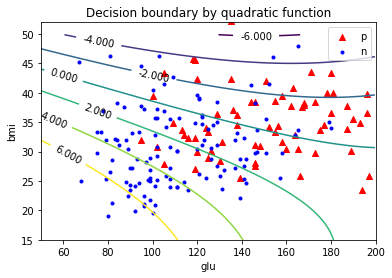

In [32]:
plt.figure('Decision boundary by quadratic function')
plt.title('Decision boundary by quadratic function')
plt.scatter(positive_sample['Glucose'], positive_sample['BMI'], marker='^', color='red', label='p')
plt.scatter(negtive_sample['Glucose'], negtive_sample['BMI'], marker='.', color='blue', label='n')
plt.xlim(50, 200)
plt.ylim(15, 52)
plt.xlabel('glu')
plt.ylabel('bmi')
plt.legend()

x = np.arange(50, 200, 0.375)
y = np.arange(10, 50, 0.1)
z = np.empty((len(x),len(y)),dtype='float')
for i in range(len(x)):
  for j in range(len(y)):
    z[i][j] = quadratic_if(x[i], y[j])
contour = plt.contour(x, y, z, [-6,-4,-2,0,2,4,6])
plt.clabel(contour, colors=('k'))

<a list of 7 text.Text objects>

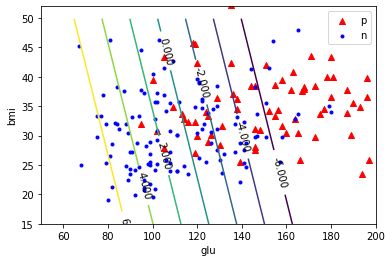

In [33]:
plt.figure('Decision boundary by linear function')
plt.scatter(positive_sample['Glucose'], positive_sample['BMI'], marker='^', color='red', label='p')
plt.scatter(negtive_sample['Glucose'], negtive_sample['BMI'], marker='.', color='blue', label='n')
plt.xlim(50, 200)
plt.ylim(15, 52)
plt.xlabel('glu')
plt.ylabel('bmi')
plt.legend()

x = np.arange(50, 200, 0.375)
y = np.arange(10, 50, 0.1)
z = np.empty((len(x),len(y)),dtype='float')
for i in range(len(x)):
  for j in range(len(y)):
    z[i][j] = linear_if(x[i], y[j])
contour = plt.contour(x, y, z, [-6,-4,-2,0,2,4,6])
plt.clabel(contour, colors=('k'))

In [315]:
def performace_evaluation(df):

-1